DHARVI MITTAL |
E20CSE018 |
EB07

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import minmax_scale
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier 
from sklearn import metrics
from sklearn.preprocessing import MultiLabelBinarizer, StandardScaler
from sklearn.metrics import confusion_matrix, precision_recall_fscore_support
import warnings
warnings.filterwarnings("ignore") 

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/glass.data",na_values="?",names=['id number','Refractive Index (RI)','Sodium (Na)','Magnesium (Mg)','Aluminium (Al)','Silicon (Si)','Potassium (K)','Calcium (Ca)','Barium (Ba)','Iron (Fe)','Type of Glass'])
data

,id number,Refractive Index (RI),Sodium (Na),Magnesium (Mg),Aluminium (Al),Silicon (Si),Potassium (K),Calcium (Ca),Barium (Ba),Iron (Fe),Type of Glass
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...
209,210,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,211,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,212,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,213,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [8]:
data.shape

(214, 11)

In [9]:
x = data.iloc[:, :-1]
x

,id number,Refractive Index (RI),Sodium (Na),Magnesium (Mg),Aluminium (Al),Silicon (Si),Potassium (K),Calcium (Ca),Barium (Ba),Iron (Fe)
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0
...,...,...,...,...,...,...,...,...,...,...
209,210,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0
210,211,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0
211,212,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0
212,213,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0


In [10]:
y = data.iloc[:, -1]
y

0      1
1      1
2      1
3      1
4      1
      ..
209    7
210    7
211    7
212    7
213    7
Name: Type of Glass, Length: 214, dtype: int64

In [12]:
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.20, random_state=0)

In [14]:
scale = StandardScaler()
x_scaled = scale.fit_transform(X_train)
x_scaled = pd.DataFrame(x_scaled,columns=X_train.columns)

In [15]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [28]:
y_pred = knn.predict(X_test)
y_pred

array([7, 1, 2, 6, 5, 2, 2, 2, 1, 2, 1, 3, 3, 2, 2, 7, 2, 1, 3, 3, 5, 2,
       7, 7, 3, 1, 7, 1, 2, 2, 1, 1, 2, 2, 2, 3, 1, 3, 2, 7, 2, 6, 2])

In [29]:
knn.score(X_test, y_test)

0.9534883720930233

In [30]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
from sklearn.metrics import accuracy_score 
print ("Accuracy : ", accuracy_score(y_test, y_pred))
cm

Accuracy :  0.9534883720930233


array([[ 9,  0,  0,  0,  0,  0],
       [ 0, 17,  2,  0,  0,  0],
       [ 0,  0,  5,  0,  0,  0],
       [ 0,  0,  0,  2,  0,  0],
       [ 0,  0,  0,  0,  2,  0],
       [ 0,  0,  0,  0,  0,  6]])

In [31]:
df = pd.DataFrame({'Real Values':y_test, 'Predicted Values':y_pred})
df

,Real Values,Predicted Values
197,7,7
37,1,1
89,2,2
176,6,6
170,5,5
75,2,2
96,2,2
137,2,2
5,1,1
83,2,2


In [19]:
from sklearn.model_selection import cross_val_score
import numpy as np
knn_cv = KNeighborsClassifier(n_neighbors=3)
cv_scores = cross_val_score(knn_cv, x, y, cv=5)
print(cv_scores)
print('cv_scores mean:{}'.format(np.mean(cv_scores)))

[0.69767442 1.         1.         1.         0.5952381 ]
cv_scores mean:0.8585825027685493


In [21]:
from sklearn.model_selection import GridSearchCV
knn2 = KNeighborsClassifier()
param_grid = {'n_neighbors': np.arange(1, 25)}
knn_gscv = GridSearchCV(knn2, param_grid, cv=5)
knn_gscv.fit(x, y)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24])})

In [22]:
knn_gscv.best_params_

{'n_neighbors': 8}

In [23]:
knn_gscv.best_score_

0.8635658914728683

In [39]:
from sklearn.model_selection import GridSearchCV
def plot_search_results(grid):
    ## Results from grid search
    results = grid.cv_results_
    means_test = results['mean_test_score']
    stds_test = results['std_test_score']
    means_train = results['mean_train_score']
    stds_train = results['std_train_score']

    ## Getting indexes of values per hyper-parameter
    masks=[]
    masks_names= list(grid.best_params_.keys())
    for p_k, p_v in grid.best_params_.items():
        masks.append(list(results['param_'+p_k].data==p_v))

    params=grid.param_grid

    ## Ploting results
    fig, ax = plt.subplots(1,len(params),sharex='none', sharey='all',figsize=(20,5))
    fig.suptitle('Score per parameter')
    fig.text(0.04, 0.5, 'MEAN SCORE', va='center', rotation='vertical')
    pram_preformace_in_best = {}
    for i, p in enumerate(masks_names):
        m = np.stack(masks[:i] + masks[i+1:])
        pram_preformace_in_best
        best_parms_mask = m.all(axis=0)
        best_index = np.where(best_parms_mask)[0]
        x = np.array(params[p])
        y_1 = np.array(means_test[best_index])
        e_1 = np.array(stds_test[best_index])
        y_2 = np.array(means_train[best_index])
        e_2 = np.array(stds_train[best_index])
        ax[i].errorbar(x, y_1, e_1, linestyle='--', marker='o', label='test')
        ax[i].errorbar(x, y_2, e_2, linestyle='-', marker='^',label='train' )
        ax[i].set_xlabel(p.upper())

    plt.legend()
    plt.show()

In [54]:
def GridSearchForKnn(train_x, train_y):
    try:
        clf = KNeighborsClassifier()
        param_grid_knn = {"weights": ['uniform', 'distance'],
                          'n_neighbors': range(2, 5),
                          "algorithm": ['auto', 'ball_tree', 'kd_tree', 'brute'],
                          "leaf_size": range(15, 25, 3),
                          "p" : range(1, 5),
                          "n_jobs" : range(1,5, 2),
                          }
        grid = GridSearchCV(clf, param_grid_knn, verbose=3,cv=2, return_train_score = True)
        grid.fit(X_train, y_train)
        return grid

    except Exception as e:
      print(e)

In [55]:
grid = GridSearchForKnn(X_train, y_train)


weights = grid.best_params_['weights']
n_neighbors = grid.best_params_['n_neighbors']
algorithm = grid.best_params_['algorithm']
leaf_size  = grid.best_params_['leaf_size']
p = grid.best_params_['p']
n_jobs = grid.best_params_['n_jobs']

Fitting 2 folds for each of 768 candidates, totalling 1536 fits
[CV 1/2] END algorithm=auto, leaf_size=15, n_jobs=1, n_neighbors=2, p=1, weights=uniform;, score=(train=1.000, test=0.988) total time=   0.0s
[CV 2/2] END algorithm=auto, leaf_size=15, n_jobs=1, n_neighbors=2, p=1, weights=uniform;, score=(train=1.000, test=1.000) total time=   0.0s
[CV 1/2] END algorithm=auto, leaf_size=15, n_jobs=1, n_neighbors=2, p=1, weights=distance;, score=(train=1.000, test=1.000) total time=   0.0s
[CV 2/2] END algorithm=auto, leaf_size=15, n_jobs=1, n_neighbors=2, p=1, weights=distance;, score=(train=1.000, test=1.000) total time=   0.0s
[CV 1/2] END algorithm=auto, leaf_size=15, n_jobs=1, n_neighbors=2, p=2, weights=uniform;, score=(train=1.000, test=0.988) total time=   0.0s
[CV 2/2] END algorithm=auto, leaf_size=15, n_jobs=1, n_neighbors=2, p=2, weights=uniform;, score=(train=0.988, test=0.988) total time=   0.0s
[CV 1/2] END algorithm=auto, leaf_size=15, n_jobs=1, n_neighbors=2, p=2, weights=d

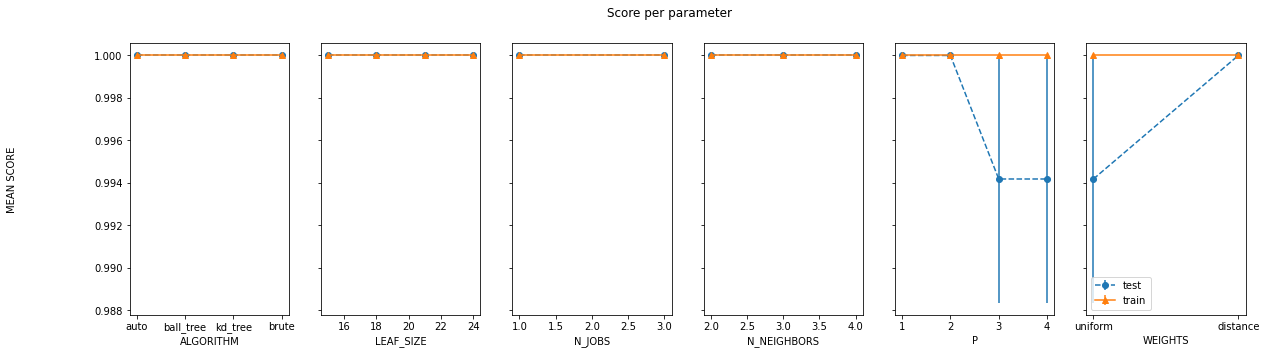

In [56]:
plot_search_results(grid)